<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regressions/ols_statistical_significance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from functools import partial

### **Construct Dataset**

In [31]:
def cef(x):
  return 0*x

def noisy_with_x(x, key):
  expected_price = cef(x)
  noise = jax.random.uniform(key,)*(x)
  return expected_price + noise

xs_true = jnp.linspace(0, 1, 1000)
ys_true = jax.vmap(noisy_with_x)(xs_true, jax.random.split(jax.random.PRNGKey(0), 1000))

pop_size = 1_000_000
xs = jax.random.uniform(jax.random.PRNGKey(0), minval=80, maxval = 3000, shape=(pop_size,))
keys = jax.random.split(jax.random.PRNGKey(0), pop_size)
ys = jax.vmap(noisy_with_x)(xs, keys)

df = pd.DataFrame({'price': ys, 'size': xs}) # Creates DataFrame from arrays

### **Regression Models**

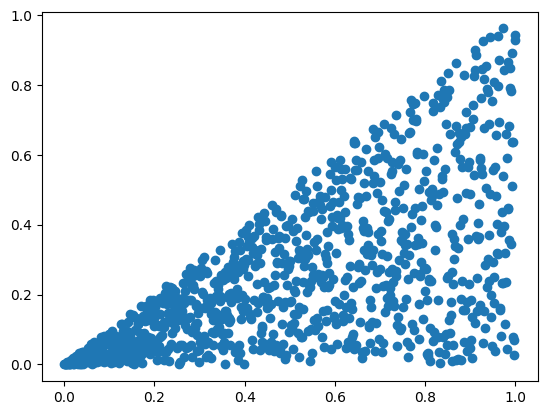

In [32]:
plt.scatter(xs_true, ys_true)

In [33]:
import statsmodels.formula.api as smf

p_values = []
for i in range(1000):
    sample_df = df.sample(n=100, random_state=i)
    results1 = smf.ols('price ~ size', data=sample_df).fit()
    p_values.append(results1.pvalues['size'])

In [34]:
f = partial(np.quantile, p_values)
ys = list(map(f, np.linspace(0, 1, 100)))

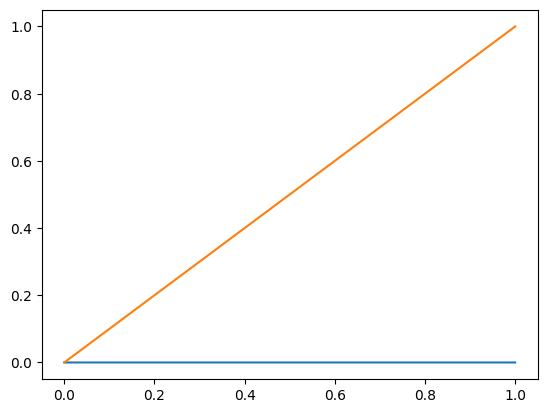

In [35]:
plt.plot(np.linspace(0, 1, 100), ys)
plt.plot([0, 1], [0, 1])
plt.show()

In [36]:
p_values

[9.322458692983052e-11,
 4.7111991069387355e-07,
 8.802324578259337e-11,
 7.960481118329051e-18,
 7.343597851321238e-11,
 7.577252876535446e-13,
 4.566522134254783e-11,
 2.7313245583826807e-14,
 3.697340840560854e-12,
 6.1272906915256836e-09,
 3.877156511791406e-12,
 2.374443655654296e-13,
 3.452945828528071e-11,
 5.705291813203676e-14,
 7.439226999427607e-13,
 9.905292803302136e-14,
 1.645189778344382e-12,
 1.9435500439067718e-11,
 1.8682106716032142e-13,
 1.0554566938300776e-11,
 5.30774695008113e-15,
 1.7079595979134634e-10,
 9.03632074683453e-10,
 1.138926448420768e-11,
 9.863398957277933e-15,
 2.891546524496754e-14,
 6.589775203162541e-14,
 1.8755450912147447e-13,
 2.2650014304546537e-10,
 2.3555357987129793e-16,
 1.7581097479885892e-15,
 7.085664607035482e-09,
 2.259275903009778e-15,
 4.791755387772423e-11,
 8.369038828631936e-15,
 5.639717951357088e-13,
 5.403913604198578e-13,
 2.314467043545335e-13,
 1.45217683035646e-08,
 2.9268700953211575e-19,
 3.750167266386421e-15,
 1.3945